Import Data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/task1.csv')


print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Explore the Data

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

Visualize the Data

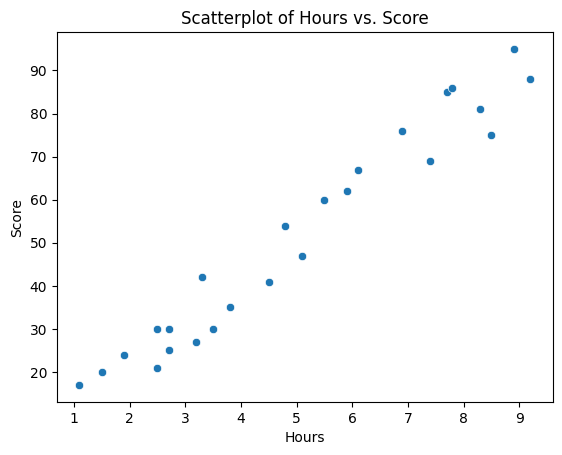

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#visualizing a scatter plot of Hours vs Score
sns.scatterplot(data=df, x='Hours', y='Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Scatterplot of Hours vs. Score')
plt.show()

Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into X (independent variable) and y (dependent variable)
X = df['Hours']
y = df['Scores']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build the Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Reshape X_train and y_train to 2D arrays
X_train_2D = X_train.values.reshape(-1, 1)
y_train_2D = y_train.values.reshape(-1, 1)

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train_2D, y_train_2D)

# Make predictions using the testing data
X_test_2D = X_test.values.reshape(-1, 1)
y_pred = model.predict(X_test_2D)

In [ ]:
# Retrieve the intercept and slope coefficients
intercept = model.intercept_
slope = model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Intercept: [2.82689235]
Slope: [9.68207815]


Evaluate the Model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared: 0.9678055545167994
Mean Squared Error (MSE): 18.943211722315272


Predict

In [ ]:
# Predict the score for a student who studies 9.25 hours/day
hours = 9.25
predicted_score = model.predict([[hours]])

print("Predicted Score for studying 9.25 hours/day:", predicted_score[0])

Predicted Score for studying 9.25 hours/day: [92.38611528]
